#Descripción del caso de estudio

En el marco del curso de Analítica de Negocios, se desarrolló un estudio orientado a analizar los factores que influyen en el rendimiento académico de los estudiantes. El propósito principal es predecir el puntaje final en el examen con base en variables relacionadas con los hábitos de estudio, el descanso y el desempeño académico previo.

Para este análisis, se utilizó la base de datos titulada “Student Exam Scores”, la cual contiene información cuantitativa recolectada de un grupo de 200 estudiantes. Esta base permite realizar análisis descriptivos, predictivos y de agrupamiento enfocados en el rendimiento académico, proporcionando un contexto ideal para aplicar técnicas de modelado de datos y aprendizaje supervisado.

* **student_id:** Identificador único asignado a cada estudiante. Es una variable de tipo categórica nominal que permite diferenciar los registros dentro del conjunto de datos.
Rol analítico: Variable de identificación, no se utiliza para el modelado predictivo.

* **hours_studied:** Número de horas promedio que el estudiante dedica al estudio antes del examen. Es una variable numérica continua y se considera uno de los principales factores que pueden influir en el rendimiento académico.
Rol analítico: Variable explicativa con potencial de pronóstico.

* **sleep_hours:** Promedio de horas de sueño diario del estudiante. Esta variable numérica continua puede reflejar los hábitos de descanso y su impacto en el desempeño académico.
Rol analítico: Variable explicativa con potencial de pronóstico.

* **attendance_percent:** Porcentaje de asistencia a clases durante el curso. Es una variable numérica continua que mide el compromiso y la constancia del estudiante en el proceso educativo.
Rol analítico: Variable explicativa con potencial de pronóstico.

* **previous_scores:** Promedio de las calificaciones obtenidas en evaluaciones anteriores. Es una variable numérica discreta que sirve como indicador del desempeño histórico del estudiante.
Rol analítico: Variable explicativa con potencial de pronóstico.

* **exam_score:** Puntaje final obtenido en el examen principal. Es una variable numérica continua que representa el nivel actual de rendimiento académico del estudiante.
Rol analítico: Variable objetivo (target) utilizada para tareas de predicción o regresión.

La base de datos permite aplicar modelos de regresión supervisada para predecir el puntaje final del examen a partir de variables como las horas de estudio, el sueño, la asistencia y el desempeño previo. También puede utilizarse para clasificar estudiantes según su nivel de rendimiento o realizar agrupamientos que identifiquen patrones comunes en sus hábitos académicos.

#1. Modelo de arbol

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #modelo de árbol de decisión
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
nxl = '/content/sample_data/student_exam_scores.xlsx'
XDB = XDB = pd.read_excel(nxl, sheet_name=0) #Base de datos hoja AA
XDB=XDB.dropna() #Elimina celdas erroneas o N/A.
XDB.head(100)

XDB=XDB[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'exam_score']]

#separar variables de entrada y de salida
XD=XDB[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']] #salida
yd=XDB['exam_score'] #salida

In [4]:
yd_classified = (yd >= yd.median()).astype(int)

mar = DecisionTreeClassifier(criterion='gini', max_depth=4) #5 por que son el numero de variables de entrada para darle oportunidad a cada una que tenga su rama
mar.fit(XD,yd_classified) #Este hace todo lo que hicimos en la clase pasada

#para la gráfica del arbol
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(mar, feature_names=XD.columns) #nombre a los cuadros del arbos
graph = graph_from_dot_data(dot_data) #formato de datos
graph.write_png('arbol.png') #publicarlos

True

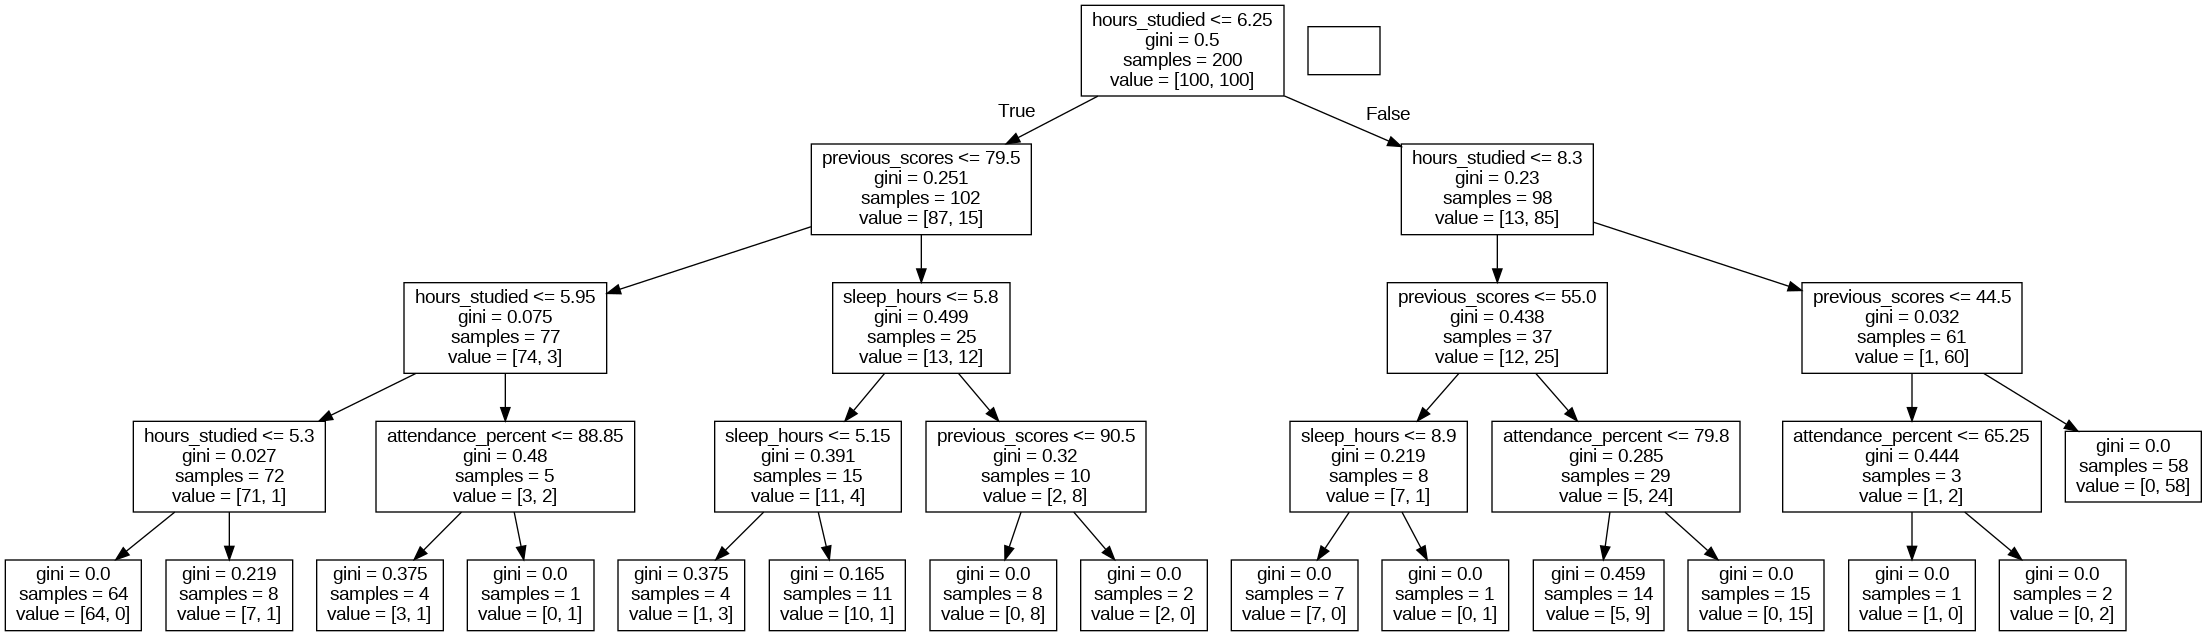

In [5]:
ydp = mar.predict(XD) #Vamos a estresar el modelo (pronosticar con los datos para ver como funcionó el modelo), backtesting
cm = confusion_matrix(yd_classified, ydp)
print(cm)

VN = cm[0,0]; FP = cm[0,1]; FN = cm[1,0]; VP = cm[1,1]
print('VN=', VN, 'FP=', FP, 'FN=', FN, 'VP=', VP)
TD= VN+FP+FN+VP

#Exactitud: muestra el comportamiento general del modelo
Ex = (VN+VP)/TD; print("La exactitud es:", Ex)
#Tasa de error: Porcentaje de equivocación
Te = (FP+FN)/TD; print("La tasa de error es:", Te)
#Sensibilidad: Como se comporta el modelo frnete a los preaprobados
Se = VP/(VP+FN); print("La sensibilidad:", Se)
#Especificidad: Como se comporta el modelo frente a los prenegados
Es = VN/(VN+FP); print("La tasa negativa verdadera es:", Es)
#Presición: Capacidad del modelo para predecir VP
pr= VP/(VP+FP); print("La precisión es:", pr)
#Presición negativa: Capacidad del modelo para predecir VN
prn= VN/(VN+FN); print("La precisión negativa es:", prn)

[[94  6]
 [ 3 97]]
VN= 94 FP= 6 FN= 3 VP= 97
La exactitud es: 0.955
La tasa de error es: 0.045
La sensibilidad: 0.97
La tasa negativa verdadera es: 0.94
La precisión es: 0.941747572815534
La precisión negativa es: 0.9690721649484536


#2. Modelo K-means o de clusterizacion

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

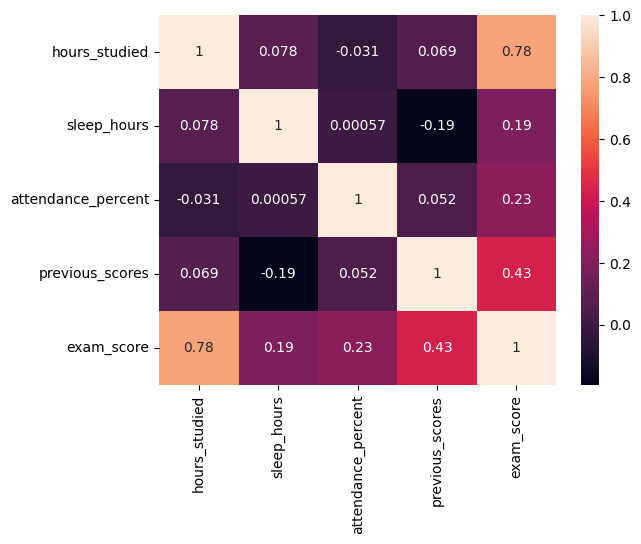

<Figure size 640x480 with 0 Axes>

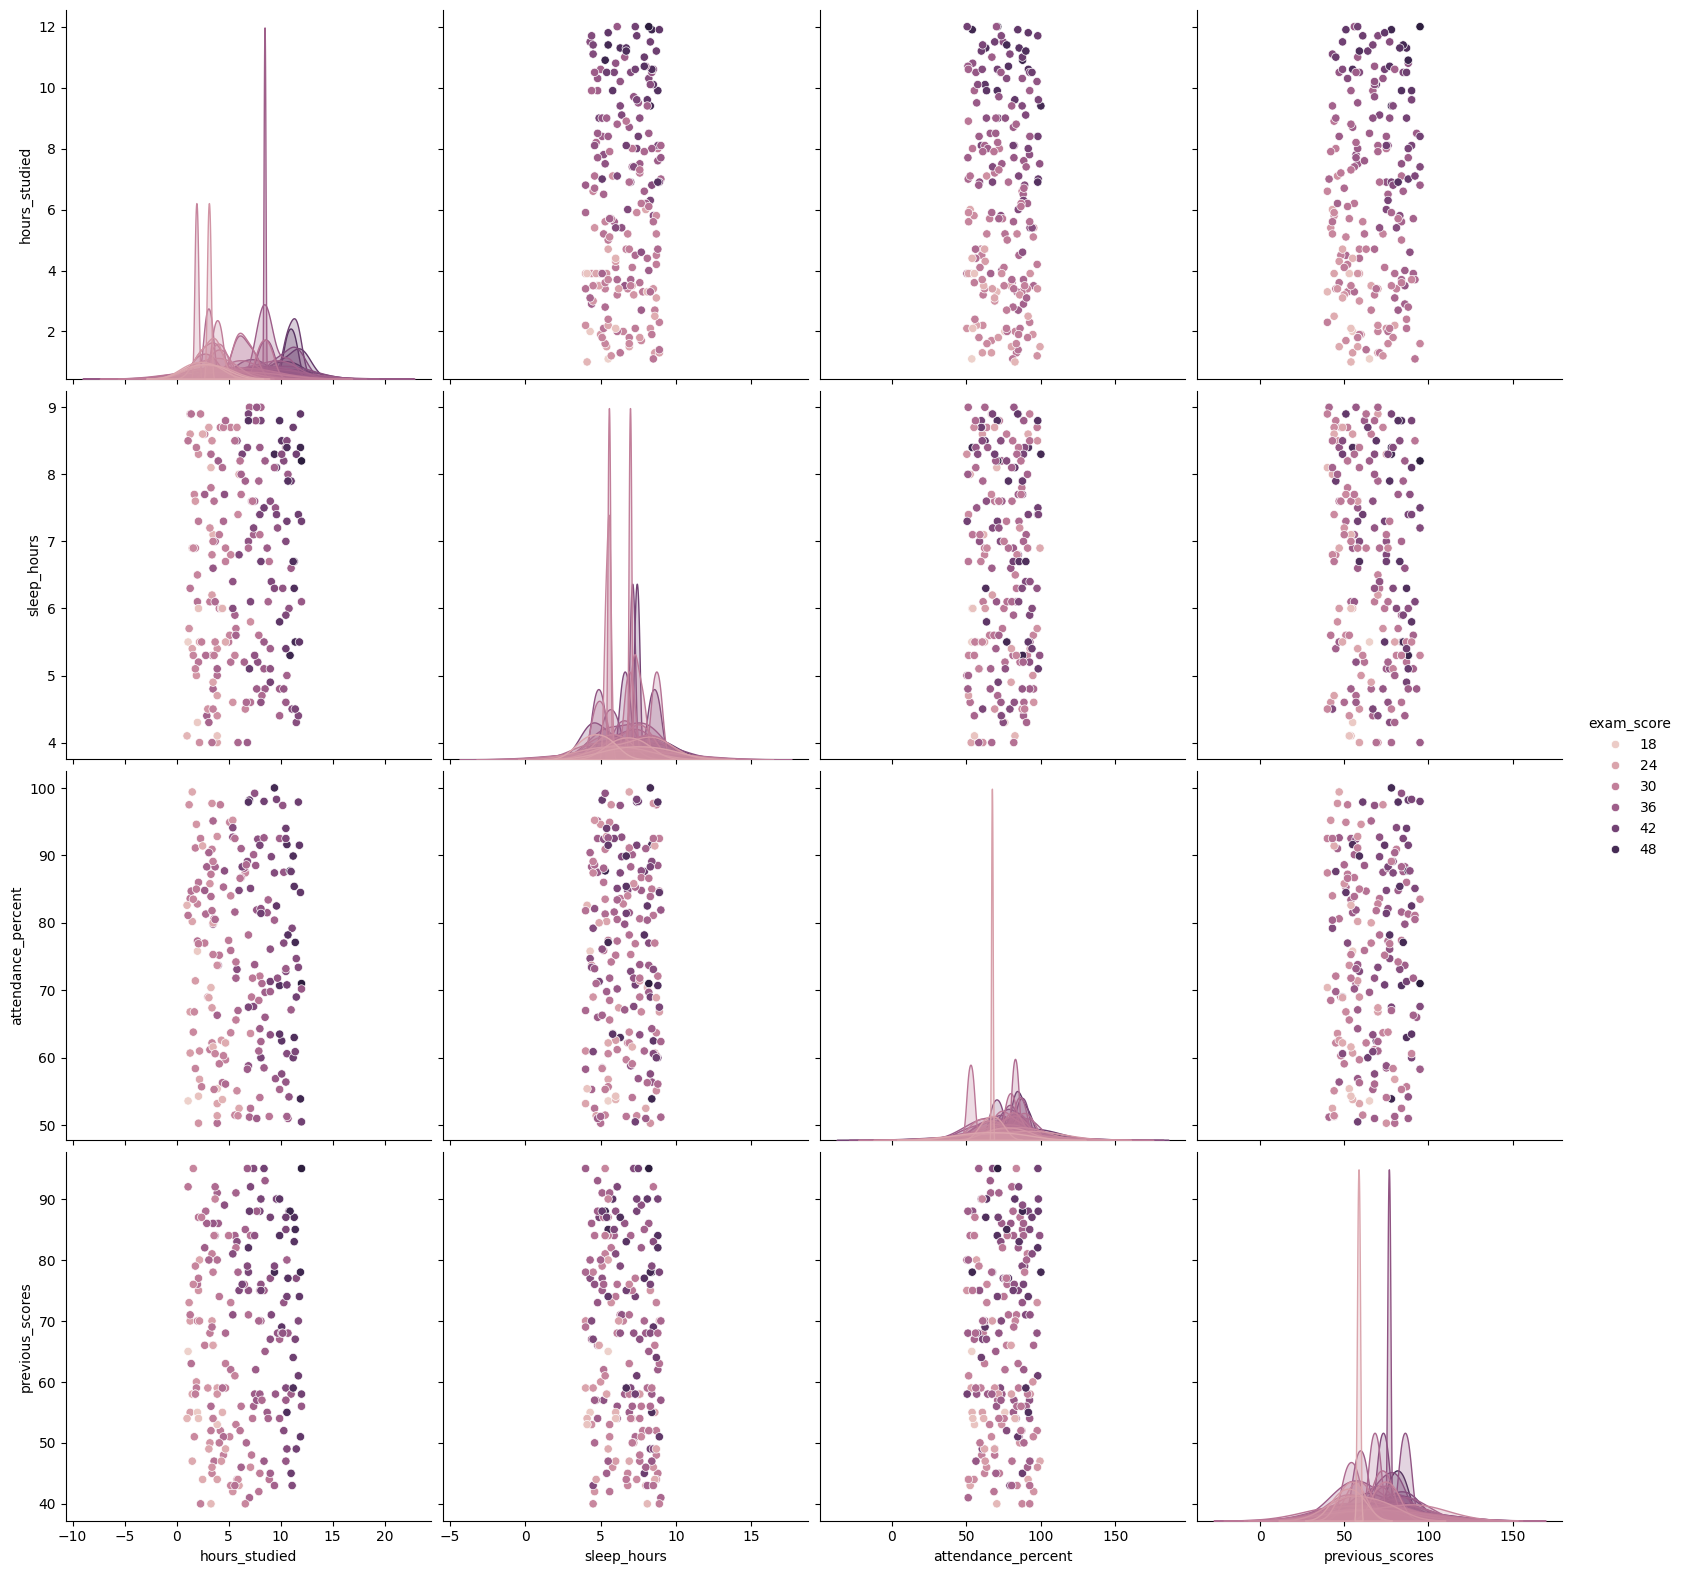

In [7]:
import seaborn as sns
sns.heatmap(XDB.corr(), annot = True) #Da los niveles de correlacióm. Si esta es positiva ambar variables se comportan de manera similar, si da negativa es lo opuesto la una de la otra.
plt.figure()
sns.pairplot(XDB, hue = 'exam_score', size = 4, vars = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores'])
plt.show()

In [10]:
np.random.seed(42)
k = 5
mkm = KMeans(n_clusters=k, init='random', random_state=42)
# Agrupar los datos originales, incluyendo la variable continua exam_score.
XDB['Cluster'] = mkm.fit_predict(XDB[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'exam_score']])
print("Number of students in each cluster (based on exam_score_alta):")
print(XDB['Clusters_con_altas/bajas'].value_counts().sort_index())

Number of students in each cluster (based on exam_score_alta):
Clusters_con_altas/bajas
0    48
1    34
2    44
3    20
4    54
Name: count, dtype: int64


In [9]:
MeanScore = XDB['exam_score'].median()
XDB['exam_score_alta'] = (XDB['exam_score'] >= MeanScore).astype(int)
mkm_highlow = KMeans(n_clusters=k, init='random', random_state=42)

# Ajuste el modelo KMeans a las columnas relevantes, incluyendo exam_score_alta.
XDB['Clusters_con_altas/bajas'] = mkm_highlow.fit_predict(XDB[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'exam_score_alta']])

proporcionesaltas = XDB.groupby('Clusters_con_altas/bajas')['exam_score_alta'].mean()
print("Proporción de puntuaciones altas dentro de cada cluster:\n")
print(proporcionesaltas)

# Determine the dominant class ('high' or 'low') for each cluster
Predicciones = (proporcionesaltas > 0.5).astype(int)

# Crear una asignación entre la etiqueta del clúster y la clase prevista (0 para baja, 1 para alta)
# El resultado de astype(int) ya es la asignación deseada (0 o 1)
# Podemos renombrar el índice para mayor claridad si es necesario, pero la serie en sí misma es la asignación.
# Por ejemplo, para asignar 0 a «bajo» y 1 a «alto» en un diccionario:

print("Predicciones del cluster (0: Baja, 1: Alta):\n")
print(Predicciones)

# la columna proporcionesaltas para buscar la clase prevista correspondiente.
XDB['Prediccion_score_alta'] = XDB['Clusters_con_altas/bajas'].map(Predicciones)


Proporción de puntuaciones altas dentro de cada cluster:

Clusters_con_altas/bajas
0    0.354167
1    0.500000
2    0.295455
3    0.750000
4    0.703704
Name: exam_score_alta, dtype: float64
Predicciones del cluster (0: Baja, 1: Alta):

Clusters_con_altas/bajas
0    0
1    0
2    0
3    1
4    1
Name: exam_score_alta, dtype: int64


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the confusion matrix
cm_cluster = confusion_matrix(XDB['exam_score_alta'], XDB['Prediccion_score_alta'])
print("Confusion Matrix:\n", cm_cluster)

# Calculate evaluation metrics
accuracy = accuracy_score(XDB['exam_score_alta'], XDB['Prediccion_score_alta'])
precision = precision_score(XDB['exam_score_alta'], XDB['Prediccion_score_alta'])
recall = recall_score(XDB['exam_score_alta'], XDB['Prediccion_score_alta'])
f1 = f1_score(XDB['exam_score_alta'], XDB['Prediccion_score_alta'])

print("\nMetricas de evaluación:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Confusion Matrix:
 [[79 21]
 [47 53]]

Metricas de evaluación:
Accuracy: 0.6600
Precision: 0.7162
Recall (Sensitivity): 0.5300
F1-score: 0.6092


**ANALISIS DE RESULTADOS**

Para la impelemntación de ambos modelos se utilizó la base de datos, conformada por 200 registros de estudiantes.

El modelo de árbol de desición tuvo un total de 200 estudiantesm en la cual se analizaron cuatro variables explicativas y un avariable objetivo.

El modelo se construyó con el propósito de identifcar los factores que más influyen en rendimiento académico y predecir, con base en los hábitos y antecedentes del estudiante, su nivel de desmepeño final.El uso del árbol de decisión permitió clasificar a los estudiantes, según el impacto de cada variable en su puntaje, generando reglas de decisión comprensibles y jerarquicas.

Dentro del modelo de árbol de decisión, los nodos más altos del árbol , las divisiones se generan principalmente a partir de la variable hours_studied, la cual actúa como criterio inicial de partición. Esta decisión refleja que el tiempo de estudio es el factor más fuerte para segmentar a los estudiantes, Los nodos intermedios tienden a dividirse según previous_scores y attendance_percent, refinando la clasificación y reduciendo la impureza del árbol. Finalmente, en los nodos puros, los datos se agrupan con niveles de variabilidad mínimos, representando estudiantes con características prácticamente idénticas.

En ejemplo, los nodos puros del modelo agrupan a estudiantes que estudian más de 7 horas, tienen una asistencia superior al 85% y un promedio previo mayor a 70, concentrando los puntajes de examen más altos (por encima de 35 puntos).
De forma opuesta, los nodos puros que reúnen a estudiantes con menos de 3 horas de estudio y asistencia menor al 70% registran los puntajes más bajos (menores a 25 puntos).

Esto evidencia que el árbol logró una segmentación eficiente y coherente, donde los nodos finales representan grupos homogéneos y consistentes, lo que indica un buen nivel de aprendizaje del modelo y un comportamiento predecible de las variables explicativas.

El modelo de clasificación obtuvo una matriz de confusión con 94 verdaderos negativos, 97 verdaderos positivos, 6 falsos positivos y 3 falsos negativos. A partir de estos resultados, se alcanzó una exactitud del 95.5% y una tasa de error del 4.5%, lo que evidencia un excelente desempeño general.

La sensibilidad fue de 0.97, indicando que el modelo identificó correctamente el 97% de los casos positivos, mientras que la especificidad fue de 0.94, mostrando una buena capacidad para reconocer los casos negativos. Asimismo, la precisión positiva alcanzó el 94%, y la precisión negativa el 97%, reflejando un equilibrio adecuado en la clasificación de ambas clases.

En conjunto, los resultados demuestran que el modelo presenta un alto nivel de acierto, bajo margen de error y comportamiento equilibrado, por lo que puede considerarse un modelo confiable y estable para la predicción dentro de la base de datos analizada.

El análisis de correlación evidenció que las variables con mayor relación con el puntaje final del examen son las horas de estudio y las calificaciones previas, con coeficientes de 0.78 y 0.43 respectivamente. Esto indica que los estudiantes que dedican más tiempo al estudio y que han tenido buenos resultados en el pasado tienden a obtener mejores desempeños académicos. En contraste, las variables asistencia (0.23) y horas de sueño (0.19) mostraron correlaciones positivas pero débiles, lo que sugiere que, aunque influyen en el rendimiento, su efecto es menos significativo. En conjunto, los resultados muestran que el hábito de estudio es el factor más determinante dentro del comportamiento académico general.

El análisis visual mediante el pairplot refuerza los resultados anteriores, mostrando que las horas de estudio y los puntajes previos guardan una clara tendencia positiva frente al rendimiento académico, ya que a medida que aumentan estas variables, también lo hacen los resultados de los exámenes. En cambio, las variables asistencia y sueño presentan una distribución más dispersa, sin un patrón definido, lo que confirma que su impacto es menor. En general, el gráfico permite observar que el rendimiento académico de los estudiantes está más estrechamente asociado con su dedicación al estudio y su historial de desempeño, factores que reflejan constancia y preparación más que hábitos externos como el descanso o la asistencia.

El análisis de los clusters revela la existencia de dos grupos principales de desempeño académico. Los clusters 3 y 4, con proporciones de puntuaciones altas del 75% y 70.3% respectivamente, representan a los estudiantes con mejor rendimiento, caracterizados probablemente por mayores horas de estudio y puntajes previos más altos. En contraste, los clusters 0, 1 y 2 concentran un menor porcentaje de puntuaciones altas (entre 29% y 50%), lo que los ubica en el grupo de bajo rendimiento. El modelo de clasificación presentó una exactitud del 66%, lo que indica un desempeño medio en la predicción del nivel de rendimiento académico. Aunque logra identificar correctamente la mayoría de los casos, mantiene un margen de error del 34%, especialmente en la detección de estudiantes con puntajes altos (sensibilidad del 53%). La precisión del 71.6% demuestra que, cuando el modelo predice un rendimiento alto, suele acertar con buena fiabilidad, aunque todavía falla en reconocer a casi la mitad de los estudiantes que realmente pertenecen a esa categoría.




In [12]:
# Calcular la mediana de la columna 'exam_score'
median_exam_score = XDB['exam_score'].median()

# Mostrar la mediana
print(f"La mediana del puntaje del examen es: {median_exam_score}")

La mediana del puntaje del examen es: 34.05
